#  <font color='blue'> Case Study: BoomBikes – Demand Forecasting for a Bike-Sharing System </font>
#### <font color='red'> Problem Statement </font>
🔥 BoomBikes, a US-based bike-sharing provider, has been facing significant revenue drops due to the ongoing COVID-19 pandemic. The company offers a service where bikes can be borrowed from computer-controlled "docks" for a fee or free. Customers provide payment information to unlock bikes, which can then be returned to any dock in the system.

🔥 To recover and sustain in the competitive market post-pandemic, BoomBikes aims to design a strategic plan to boost revenues and align with market demands effectively.


#### <font color='green'> Business Requirements </font>
➤Important topic BoomBikes intends to achieve the following goals:

💡Model the demand for shared bikes

💡Leverage available independent variables to predict the demand for shared bikes. 

💡Use the model to analyze how demand fluctuates with changes in different features.

💡Inform strategic decisions

💡Help management understand demand patterns to adjust business strategies accordingly.

💡Align supply levels with demand to meet customer expectations effectively.

💡Expand to new markets

💡Utilize the model to comprehend demand dynamics in potential new markets.

💡Formulate strategies for market entry and customer acquisition.

#### <font color='green'> eBusiness Goal </font>
➤Develop a predictive model for shared bike demand:

💡Objective: Understand demand variations with different independent variables.

💡Outcome: Enable BoomBikes to:

    ★ Design responsive business strategies.
    ★ Optimize resource allocation to improve customer satisfaction.
    ★Evaluate and plan entry into new markets using data-driven insights.
    ★By achieving these goals, BoomBikes aims to sustain and grow in a post-pandemic environment while ensuring customer satisfaction and market competitiveness.. 


## ✅ Step_0 Importing Required Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the data from csv file
bike_sharing = pd.read_csv("day.csv")

## ✅ Step 1: Understanding and Cleaning the Data 

##### Read the head of the data
bike_sharing.head()

In [3]:
#Check the shape of the dataset
bike_sharing.shape

(730, 16)

In [4]:
#Check the info of the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Describe the dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Check the null values of the dataset in each column
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
#Check the null values of the dataset in each row
round((bike_sharing.isnull().sum(axis=1)/len(bike_sharing))*100,2).sort_values(ascending=False)

729    0.0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
690    0.0
691    0.0
692    0.0
693    0.0
694    0.0
695    0.0
696    0.0
697    0.0
682    0.0
683    0.0
684    0.0
685    0.0
686    0.0
687    0.0
688    0.0
689    0.0
674    0.0
675    0.0
676    0.0
677    0.0
678    0.0
679    0.0
680    0.0
681    0.0
666    0.0
667    0.0
668    0.0
669    0.0
670    0.0
671    0.0
672    0.0
673    0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
114    0.0

In [8]:
# Check for the duplicate records and drop if any 
print('Total records - {} '.format(len(bike_sharing.value_counts())))
print('Total duplicate - {} '.format(len(bike_sharing[bike_sharing.duplicated()])))

Total records - 730 
Total duplicate - 0 


In [9]:
# Remove instant as it just an index column and not useful for analysis
bike_sharing.drop(['instant'], axis=1, inplace=True)

# Drop dteday column as it is not useful for analysis , we have month and year in seperate columns
bike_sharing.drop(['dteday'], axis=1, inplace=True)

# Drop casual and registered column as we have sum of it in cnt column as per the data dictionary document
bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)

In [10]:
#Checking the head of the dataset to confirm if columns are dropped
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Converting columns - season, mnth, weekday and weathersit to categorical variables as advised in the problem statement

In [11]:
# As per the data dictionary document, converting seasons into actual names spring,summer,fall,winter
print(bike_sharing.season.unique())
season_var = ['season']
# Defining the mapping of the function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Apply the defined function to season
bike_sharing[season_var] = bike_sharing[season_var].apply(season_map)
print(bike_sharing.season.unique())

# Checking for updated values
print(bike_sharing[season_var].value_counts())

[1 2 3 4]
['spring' 'summer' 'fall' 'winter']
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [12]:
# Converting mnth values into actual months names
print(bike_sharing.mnth.unique())

# Replacing mnth values
bike_sharing['mnth'].replace({1:"January",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July", 8:"August",9:"September", 10:"October",11:"November", 12:"December"},inplace=True)

# Checking for updated values
print(bike_sharing[['mnth']].value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
mnth     
August       62
December     62
July         62
January      62
October      62
May          62
March        62
April        60
November     60
June         60
September    60
Feb          56
Name: count, dtype: int64


In [13]:
# Converting weekday column values to actual weekday names
print(bike_sharing.weekday.unique())
weekdayVar = ['weekday']

# Defining the mapping of the function for weekday
def weekday_map(x):
    return x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday'})

# Apply the function to weekday column
bike_sharing[weekdayVar] = bike_sharing[weekdayVar].apply(weekday_map)
print(bike_sharing.weekday.unique())

# Checking for updated values
print(bike_sharing[weekdayVar].value_counts())

[6 0 1 2 3 4 5]
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
weekday  
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: count, dtype: int64


In [14]:
# Converting weatherlist column values to the names as per the data dictionary document
print(bike_sharing.weathersit.unique())

weathersitVar = ['weathersit']
# Defining the mapping of the function for weathersit
def weathersit_map(x):
    return x.map(
        {
            1: 'Clear_Few-clouds',
            2: 'Mist-Cloudy_Mist-Broken',
            3: 'Light-Snow_Light-Rain-Thunderstorm',
            4: 'Heavy-Rain-Ice-Pallets-Thunderstorm'
        })

# Apply the function to weathersit
bike_sharing[weathersitVar] = bike_sharing[weathersitVar].apply(weathersit_map)
print(bike_sharing.weathersit.unique())

# Check if values are updated
print(bike_sharing[weathersitVar].value_counts())

[2 1 3]
['Mist-Cloudy_Mist-Broken' 'Clear_Few-clouds'
 'Light-Snow_Light-Rain-Thunderstorm']
weathersit                        
Clear_Few-clouds                      463
Mist-Cloudy_Mist-Broken               246
Light-Snow_Light-Rain-Thunderstorm     21
Name: count, dtype: int64


In [15]:
#checking the detailed info of the updated dataaset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## ✅ Step 2: Visualising the Data

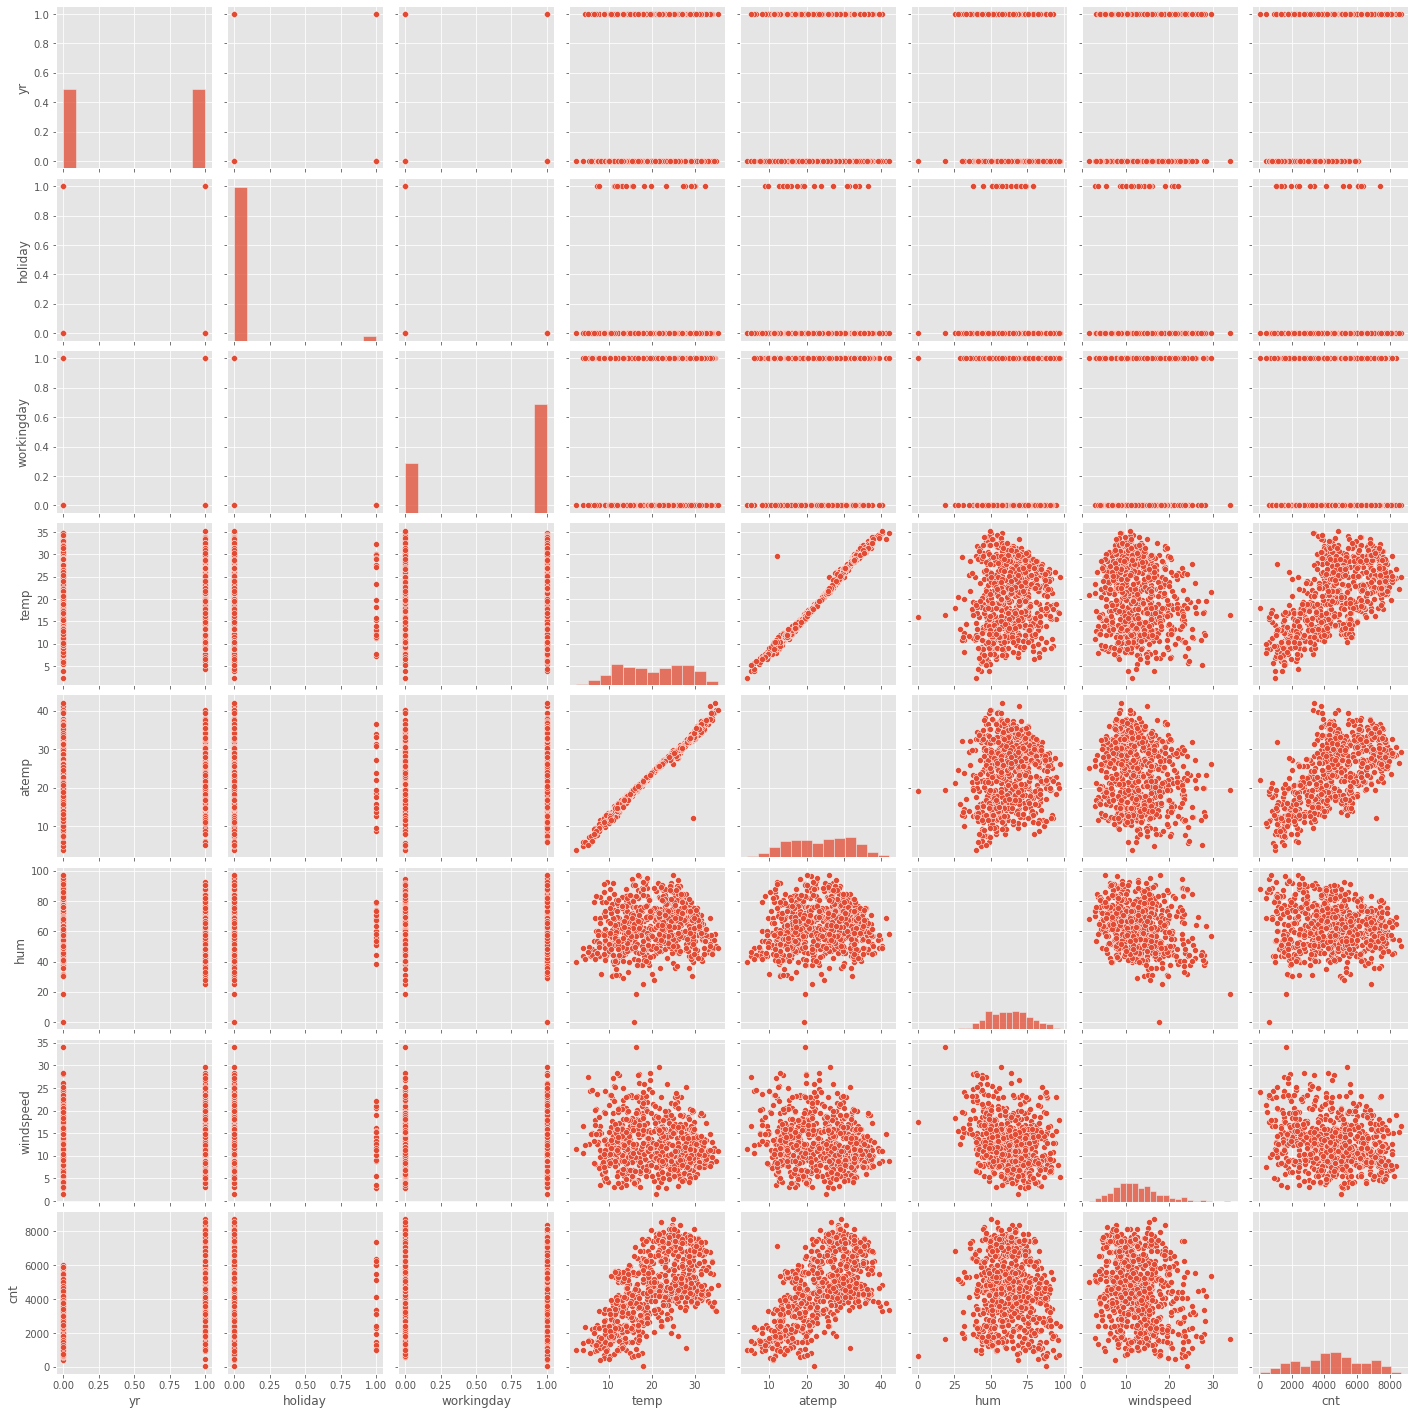

In [16]:
# Create a Pair plot for all the varaibles
sns.pairplot(bike_sharing)
plt.show()

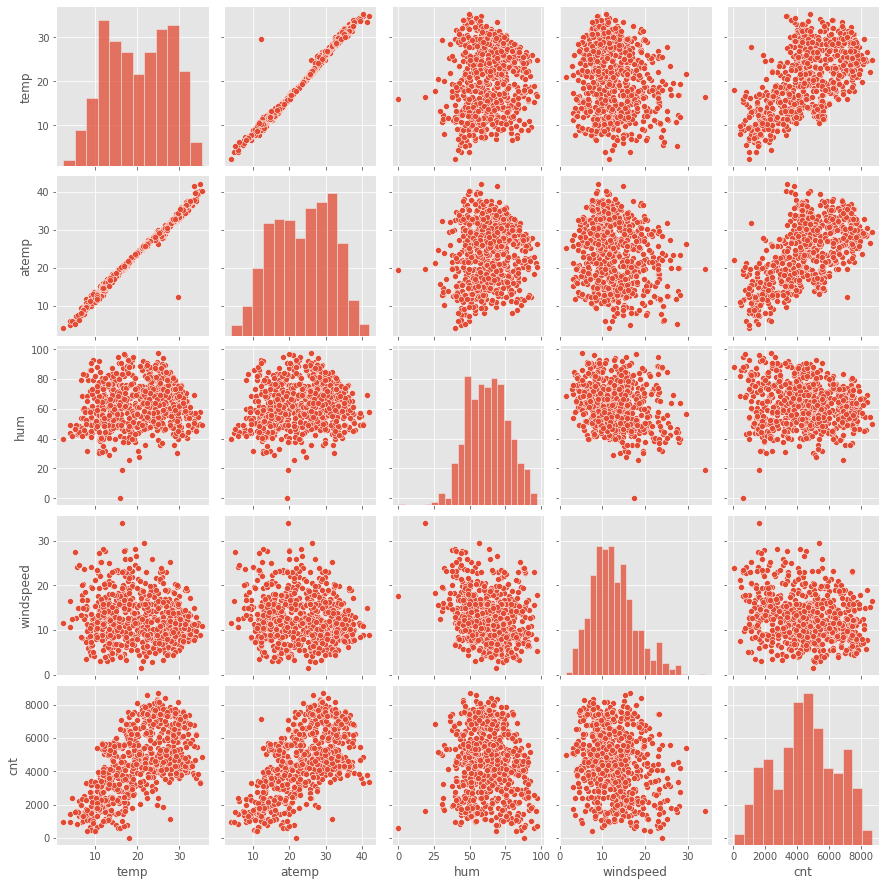

In [17]:
# Creating a pairplot of all the numeric variables and exculde the boolean variables 
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_sharing[numeric_variables])
plt.show()

Inference :  Both temp and atemp are highly correlated with cnt

yr                                               0
holiday                                          0
workingday                                       0
temp                                             0
atemp                                            0
hum                                              0
windspeed                                        0
cnt                                              0
season_spring                                    0
season_summer                                    0
season_winter                                    0
mnth_August                                      0
mnth_December                                    0
mnth_Feb                                         0
mnth_January                                     0
mnth_July                                        0
mnth_June                                        0
mnth_March                                       0
mnth_May                                         0
mnth_November                  

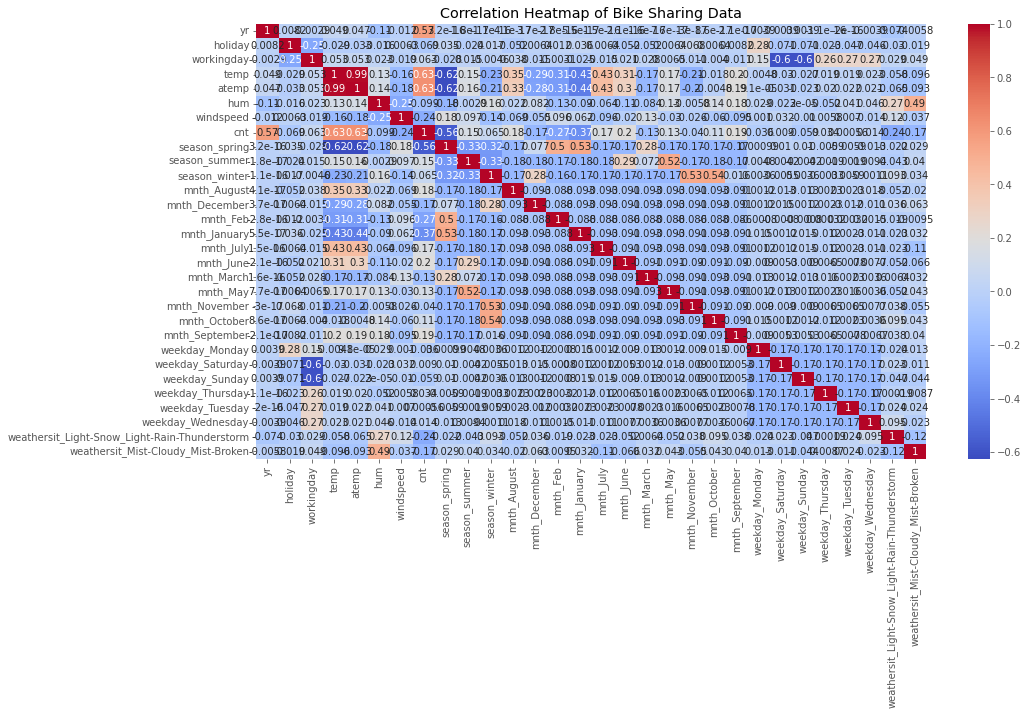

In [18]:
# Plot a heatmap to check correlation
bike_sharing_encoded = pd.get_dummies(bike_sharing, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
print(bike_sharing_encoded.isnull().sum())
plt.figure(figsize=(15, 8))
sns.heatmap(bike_sharing_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bike Sharing Data')
plt.show()

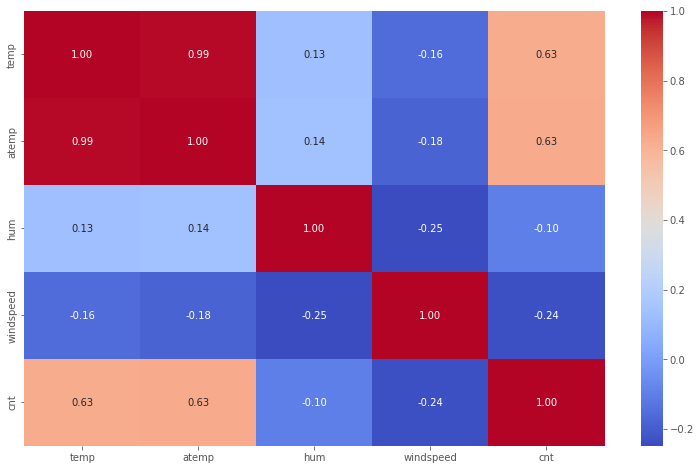

In [19]:
# Plot a heatmap to check correlation of numeric variables
plt.figure(figsize=(13, 8))
sns.heatmap(bike_sharing[numeric_variables].corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, cbar=True)
plt.show()

In [20]:
# The heatmap indicates the correlation between temp and atemp is highly co-related. So, dropping one column as multicollinearity is visible.
# Dropping temp column
bike_sharing.drop(['temp'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist-Cloudy_Mist-Broken,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist-Cloudy_Mist-Broken,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few-clouds,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few-clouds,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few-clouds,11.46350,43.6957,12.522300,1600


Plotting to visualize Categorical Variables .

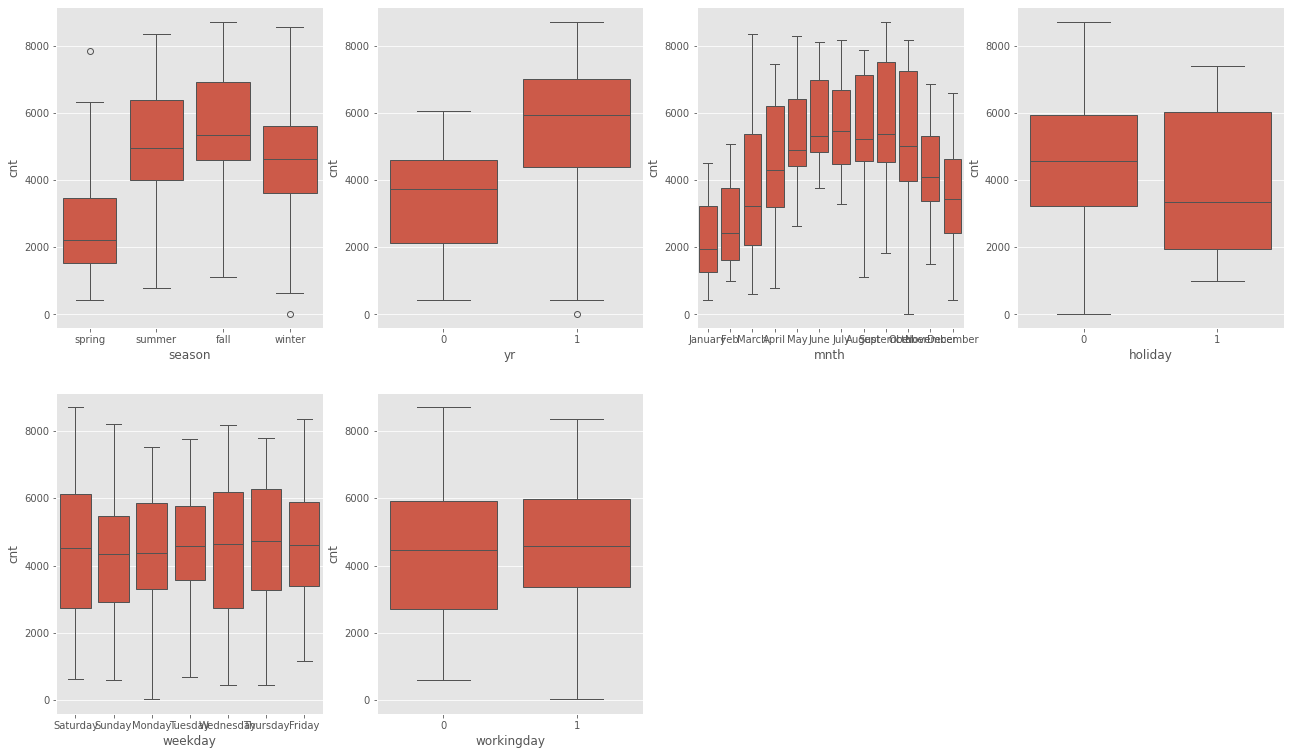

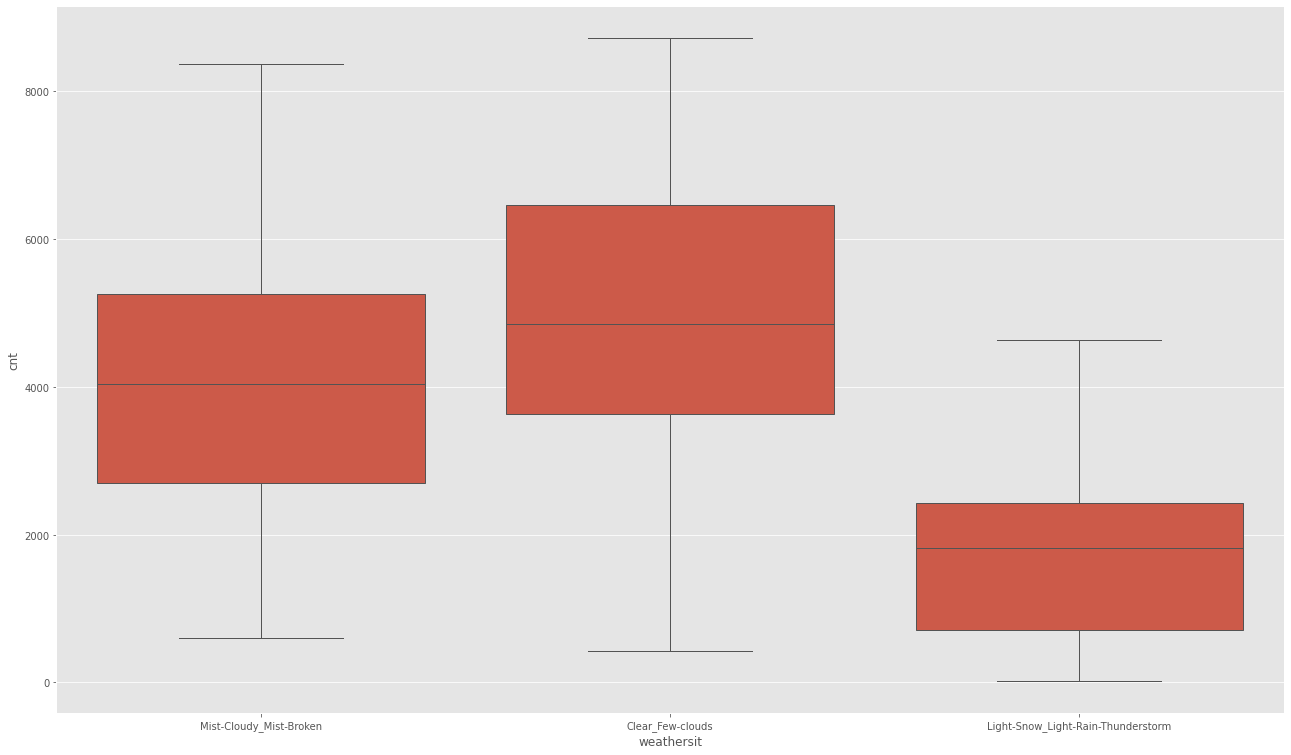

In [21]:
# creating a subplot with 2 rows and 3 columns to visulize the categorical variables

plt.figure(figsize=(22, 13))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(2,4,2)
# plt.xticks([0,1], ["2018", "2019"])
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(2,4,3)
# plt.xticks(rotation=45)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(2,4,5)
# plt.xticks(rotation=45)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

# let's take weathersit into different subplot as it has big x labels.
plt.figure(figsize=(22, 13))
plt.subplot(1,1,1)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

plt.show()

#### Inference
-   There is a low demand in spring and high demand in fall season
-   There was a high demand in 2019 and low in 2018
-   There was a high demand in month of August, Sepember, Octocer and low in Januray
-   There is a high demand in Weekend and holidays 
-   There is not much change in Day wise demand
-   There is not much change in Workingdays wise 
-   weathersit - 
    -   High demand with - "Clear, Few clouds" 
    -   low demand with "Light Snow, Light Rain"eekdays
ght Rain"

## ✅ Step 3: Data Preparation

#### Dummy variables

In [22]:
# Checking the shape before getting started
print(bike_sharing.shape)
bike_sharing.to_csv("day2.csv", index=False, header=False)


(730, 11)


In [23]:
# Creating a list of columns to create dummies where it is possible

dummy_columns_list = ['season', 'mnth', 'weekday', 'weathersit']

# Creating the dummies for the above mentioned columns
dummies = pd.get_dummies(bike_sharing[dummy_columns_list], drop_first=True)

# Concatanating dummies with original dataset
bike_sharing = pd.concat([bike_sharing, dummies], axis=1)

# Dropping the original columns after creating dummies
bike_sharing.drop(dummy_columns_list, axis=1, inplace=True)

# Checking the column after creating dummies
print(bike_sharing.columns)
bike_sharing.head()


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_Feb', 'mnth_January', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [24]:
# Converting boolean columns to integers
bike_sharing[['season_spring', 'season_summer','season_winter','mnth_August']] = bike_sharing[['season_spring', 'season_summer','season_winter','mnth_August']].astype(int)
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [25]:
print(bike_sharing.shape)

(730, 29)


In [26]:
# Converting boolean columns to integers
bike_sharing[['mnth_Feb','mnth_January','mnth_July','mnth_June','mnth_March','mnth_May','mnth_November','mnth_October','mnth_September','weekday_Monday','weekday_Saturday','weekday_Sunday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday','weathersit_Light-Snow_Light-Rain-Thunderstorm','weathersit_Mist-Cloudy_Mist-Broken']] = bike_sharing[['mnth_Feb','mnth_January','mnth_July','mnth_June','mnth_March','mnth_May','mnth_November','mnth_October','mnth_September','weekday_Monday','weekday_Saturday','weekday_Sunday','weekday_Thursday','weekday_Tuesday','weekday_Wednesday','weathersit_Light-Snow_Light-Rain-Thunderstorm','weathersit_Mist-Cloudy_Mist-Broken']].astype(int)	
bike_sharing[['mnth_December']] = bike_sharing[['mnth_December']].astype(int)
bike_sharing.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## ✅ Step 4: Splitting the Dataset into Training and Testing Sets

In [27]:
# Splitting the dataset into train and test set , assigning it the different variables
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=100)

#Checking the shape of train and test set
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [28]:
# checking the data of train data set
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
# Checking the data of test data set

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


###  Rescaling the FeaturesSscaling doesn't impact our mode, so  scainge the numeric columns to have comparable scale.

Min-Max scaling (normalisation) - Between 0 and 1 (Preffered way as it take care the outliers)

In [30]:
# Instantiating scaler object

scaler = MinMaxScaler()

In [31]:
# Applying scaler() to all the columns except theose contains 0 or 1 value

# Finding the columns those does not have 0 or 1 value
columns_to_scale = bike_sharing.loc[:, (~bike_sharing.isin([0,1]).all())].columns
print(columns_to_scale)

# Creating a list of variables to scale
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# fit_transform to train data set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


Index(['atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


In [32]:
# Checking the train dataset after scalling
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


-   All the values are converted between 0 and 1 as can be seen

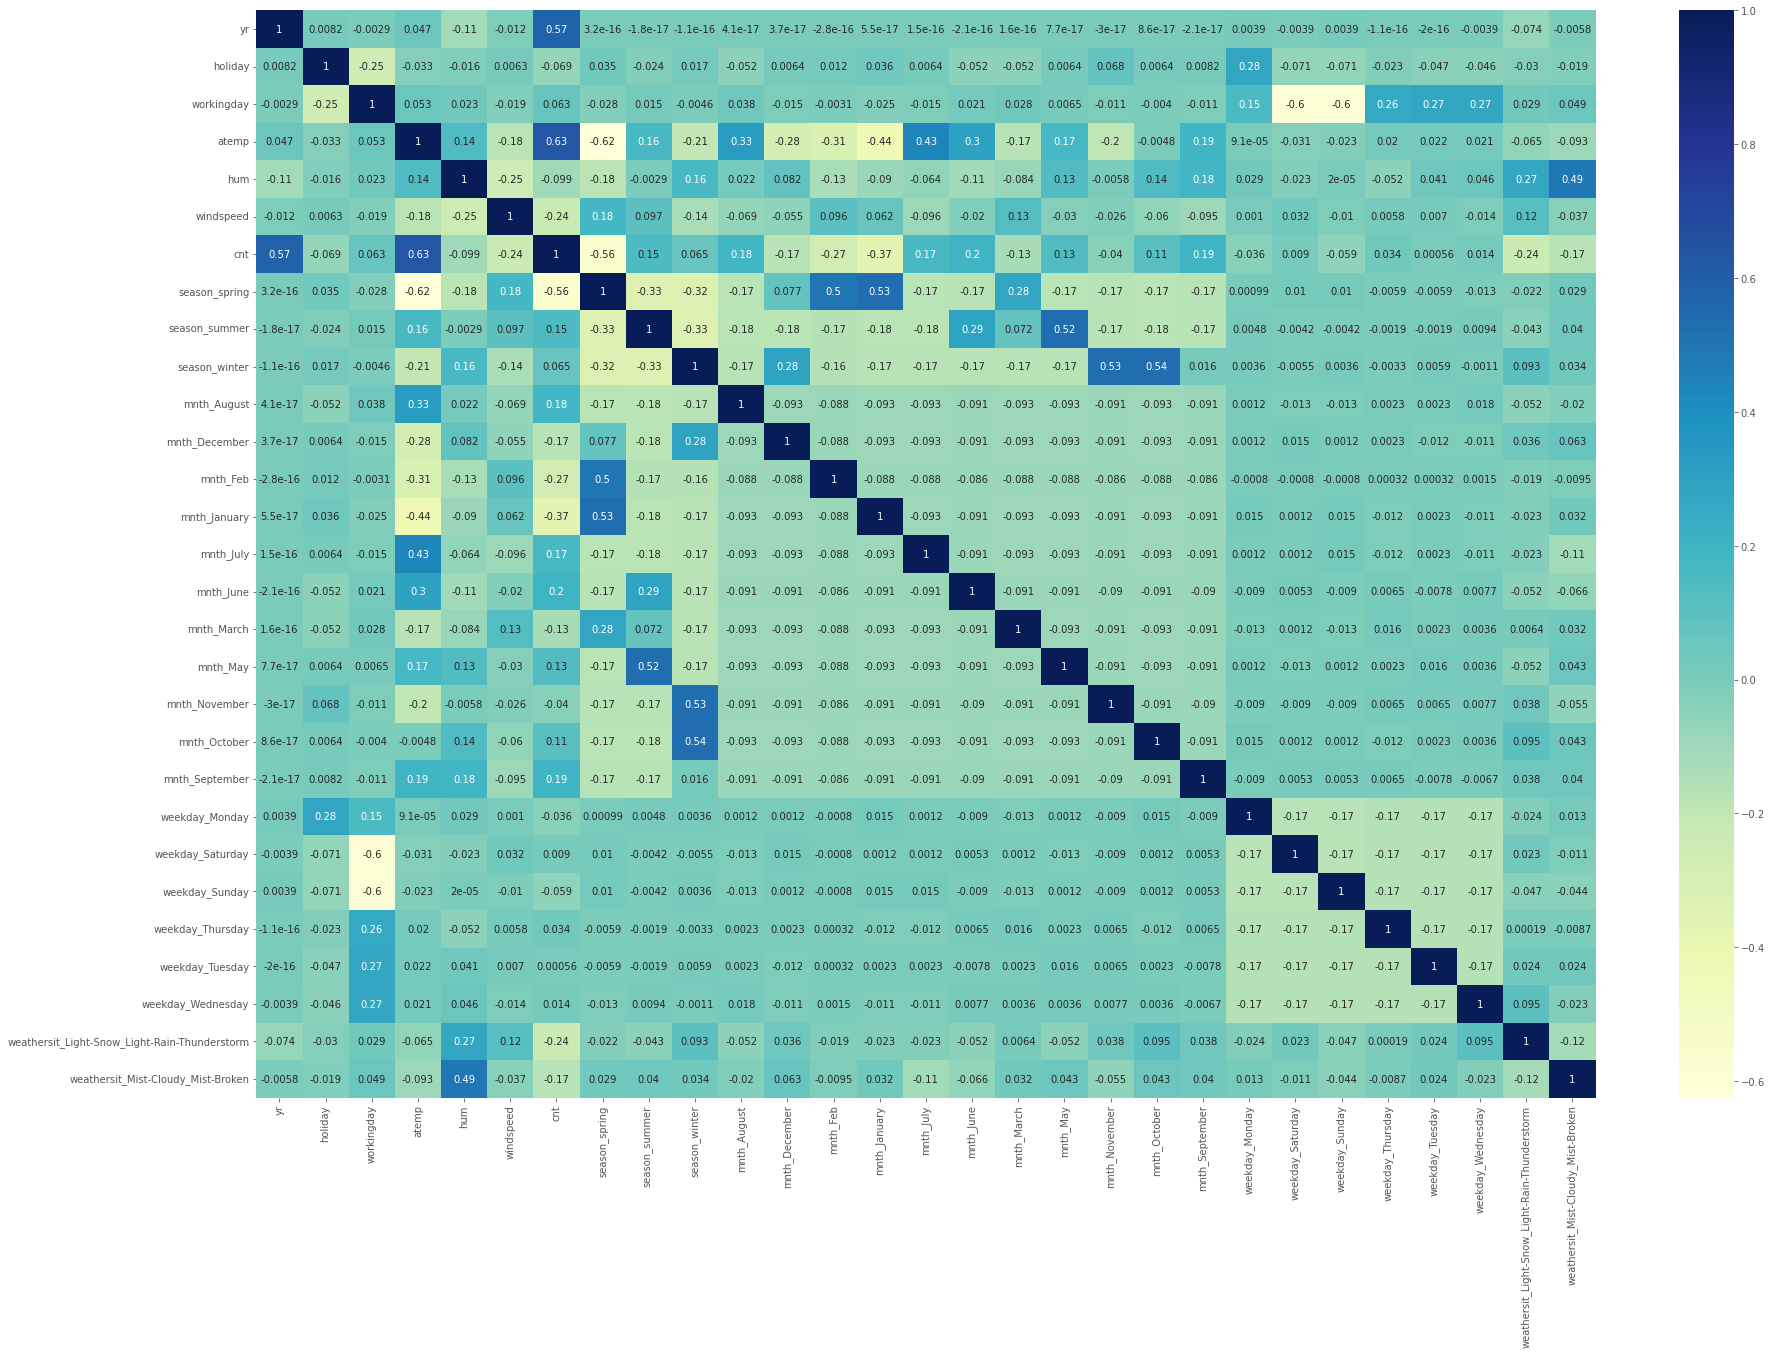

In [33]:
# checking the correlation coefficients for all variables to see which variables are highly correlated

plt.figure(figsize = (30, 20))
# plt.xticks(rotation=45)
sns.heatmap(data=bike_sharing.corr(), annot=True, cmap='YlGnBu')
plt.show()

Inference:

atemp is highly correlated with c
Plotting to 

Let's see a scatter for atemp vs cnt.

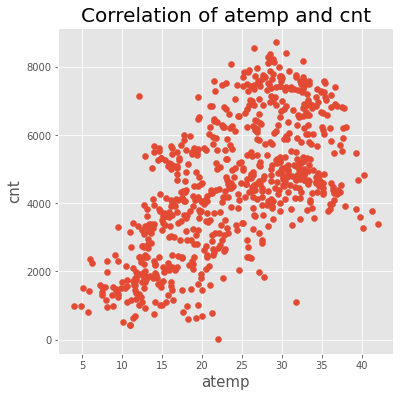

In [34]:
# Creating a scatter plot
plt.figure(figsize=[6,6])
plt.scatter(bike_sharing.atemp, bike_sharing.cnt)
plt.title('Correlation of atemp and cnt', fontsize = 20)                  # Plot heading 
plt.xlabel('atemp', fontsize = 15)  
plt.ylabel('cnt', fontsize = 15) 
plt.show()

### Dividing into X and Y sets for the model building

In [35]:
# Creating x and y train from df_train set

y_train = df_train.pop('cnt')
X_train = df_train

# Checking the shape of X and y train dataset
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


## ✅ Step 5: Building a linear model

There are three way to start with -
-   Forward approach                        - start with one variable and keep adding
-   Backward approach                       - Add all the variables and remove one by one
-   RFE - Recursive feature elimination     - Select the variable based on significance

We have 29 variable in the dataset and going with forward or backward approach would be time consuming. So let's use RFE to select the significant variables.

In [81]:
# Running RFE with the output number of the variable equal to 15

# Creating object of lm
lm = LinearRegression()

# Fitting x_train and y_train to lm object
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(7)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_August', np.False_, np.int64(6)),
 ('mnth_December', np.False_, np.int64(3)),
 ('mnth_Feb', np.False_, np.int64(4)),
 ('mnth_January', np.True_, np.int64(1)),
 ('mnth_July', np.True_, np.int64(1)),
 ('mnth_June', np.False_, np.int64(8)),
 ('mnth_March', np.False_, np.int64(14)),
 ('mnth_May', np.False_, np.int64(5)),
 ('mnth_November', np.False_, np.int64(2)),
 ('mnth_October', np.False_, np.int64(10)),
 ('mnth_September', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(9)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.True_, np.int64(1)),
 ('weekday_Thursday', np.False_, np.int64(13)),
 ('weekday_T

In [37]:
# Extracting the high significants columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_January', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [38]:
# Let's check the list of insignificant columns
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_August', 'mnth_December', 'mnth_Feb',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## ✅ <font color='blue'> Building model using statsmodel, for the detailed statistics </font>

### ✔  <font color='green'> MODEL 1 </font>

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable to the x train dataset
X_train_sm = sm.add_constant(X_train_rfe)

In [41]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
# Running the linear model by providing y and x train dataset
lm = sm.OLS(y_train, X_train_sm).fit()

# checking the parameters of lm
lm.params

const                                            0.253490
yr                                               0.232502
holiday                                         -0.002506
workingday                                       0.096557
atemp                                            0.476051
hum                                             -0.144868
windspeed                                       -0.161522
season_spring                                   -0.104264
season_winter                                    0.045799
mnth_January                                    -0.039818
mnth_July                                       -0.069934
mnth_September                                   0.062586
weekday_Saturday                                 0.106578
weekday_Sunday                                   0.052861
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.248391
weathersit_Mist-Cloudy_Mist-Broken              -0.059373
dtype: float64

In [43]:
# Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.66e-188
Time:                        17:25:53   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inferennce :
-   R-squared is high and good for prediction
-   p-value close to 0 is good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good

Looking at the p-values, it looks like some of the variables (holiday) is insignificant.
We can simply drop the variable with the high p value.
A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.67
11,weekday_Saturday,10.16
12,weekday_Sunday,9.84
3,atemp,3.11
6,season_spring,2.66
1,holiday,2.57
4,hum,1.91
7,season_winter,1.75
14,weathersit_Mist-Cloudy_Mist-Broken,1.57
8,mnth_January,1.56


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

See from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a very highVIF of `95.41`. Let's go ahead and drop this variables

Drop criteria:

1) High p-value and high VIF

2) High-low :
   >   i)  High P, Low VIF - Drop this first<br>
   >   ii) Low P-Value, High VIF - Drop this after above<br>

3) Low p and low VIF

In [45]:
# Drop holiday as it has high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [46]:
# Check the columns list after dropping holiday
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

## ✔  <font color='green'> MODEL 2 </font>
Let's repeat the process after removing a variable and check the p-value and VIF again

Observation :
-   VIF value is significantly decreased after removing workingday

In [47]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.66e-188
Time:                        17:26:02   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [48]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [49]:
# Running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const                                            0.250984
yr                                               0.232502
workingday                                       0.099063
atemp                                            0.476051
hum                                             -0.144868
windspeed                                       -0.161522
season_spring                                   -0.104264
season_winter                                    0.045799
mnth_January                                    -0.039818
mnth_July                                       -0.069934
mnth_September                                   0.062586
weekday_Saturday                                 0.109085
weekday_Sunday                                   0.055367
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.248391
weathersit_Mist-Cloudy_Mist-Broken              -0.059373
dtype: float64

In [50]:
# Let's see the summary of our linear model2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.66e-188
Time:                        17:26:04   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observation :

-   R-squared high and good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good
-   p-value is gignificantly increased for `weekday_Saturday`

In [51]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.98
2,atemp,18.21
1,workingday,17.13
10,weekday_Saturday,4.62
4,windspeed,4.51
11,weekday_Sunday,4.49
5,season_spring,3.05
13,weathersit_Mist-Cloudy_Mist-Broken,2.28
6,season_winter,2.11
0,yr,2.08


## ✔  <font color='green'> MODEL 3 </font>

Let's repeat the process after removing a variable and check the p-value and VIF again


In [52]:
# Drop weekday_Saturday
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Let's check the column list after dropping weekday_Saturday
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Sunday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [53]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.34
2,atemp,16.34
1,workingday,4.53
4,windspeed,4.00
5,season_spring,2.87
12,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.07
6,season_winter,2.04
10,weekday_Sunday,1.77
7,mnth_January,1.67


In [54]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

In [55]:
# Running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [56]:
# Checking the parameter of the model lm3
lm3.params

const                                            0.347031
yr                                               0.232458
workingday                                       0.005097
atemp                                            0.477410
hum                                             -0.148426
windspeed                                       -0.162244
season_spring                                   -0.106378
season_winter                                    0.043608
mnth_January                                    -0.040202
mnth_July                                       -0.068924
mnth_September                                   0.059218
weekday_Sunday                                  -0.038272
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.242911
weathersit_Mist-Cloudy_Mist-Broken              -0.056997
dtype: float64

In [57]:
# Let's see the summary of our linear model3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.05e-186
Time:                        17:26:10   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     496   BIC:                            -917.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## ✔  <font color='green'> MODEL 4 </font>

In [58]:
# Checking the columns in the training dataset
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Sunday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [59]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.34
2,atemp,16.34
1,workingday,4.53
4,windspeed,4.00
5,season_spring,2.87
12,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.07
6,season_winter,2.04
10,weekday_Sunday,1.77
7,mnth_January,1.67


In [60]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Checking the parameter of lm4
lm4.params

const                                            0.347031
yr                                               0.232458
workingday                                       0.005097
atemp                                            0.477410
hum                                             -0.148426
windspeed                                       -0.162244
season_spring                                   -0.106378
season_winter                                    0.043608
mnth_January                                    -0.040202
mnth_July                                       -0.068924
mnth_September                                   0.059218
weekday_Sunday                                  -0.038272
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.242911
weathersit_Mist-Cloudy_Mist-Broken              -0.056997
dtype: float64

In [61]:
# Let's see the summary of our linear model4

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.05e-186
Time:                        17:26:13   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     496   BIC:                            -917.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inference:
No p-value is greater than 0.05

## ✔  <font color='green'> MODEL 5 </font>

Now we will drop high VIF variables as we are done with high p-value

In [62]:
# Drop hum as it has high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Sunday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [63]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.55
1,workingday,4.28
3,windspeed,3.98
4,season_spring,2.35
0,yr,2.07
9,weekday_Sunday,1.69
6,mnth_January,1.61
11,weathersit_Mist-Cloudy_Mist-Broken,1.54
5,season_winter,1.46
7,mnth_July,1.36


In [64]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.params

const                                            0.270834
yr                                               0.236052
workingday                                       0.003760
atemp                                            0.444901
windspeed                                       -0.135921
season_spring                                   -0.109317
season_winter                                    0.034477
mnth_January                                    -0.044221
mnth_July                                       -0.061455
mnth_September                                   0.056009
weekday_Sunday                                  -0.042505
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.284188
weathersit_Mist-Cloudy_Mist-Broken              -0.080814
dtype: float64

In [65]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.11e-184
Time:                        17:26:17   Log-Likelihood:                 494.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     497   BIC:                            -908.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Inference:
Now we have all the p-values less than 0.05 and VIF is less then 5. So, we can stop model re-building process.

## ✅ Step 6: Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
# Calculating y predicted dataset from final model
y_train_pred = lm5.predict(X_train_lm5)

In [67]:
# Calculating error terms
residuals = y_train - y_train_pred

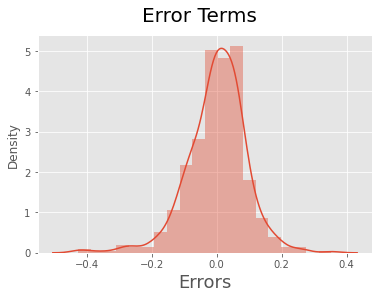

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Inference:
-   Error terms are normally distributed.

#### Verifying the Residuals using QQ Plot


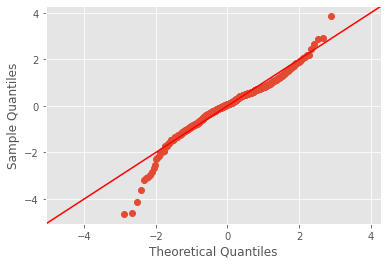

In [69]:
# Verifying same using QQ Plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Error term VS Predicted Values

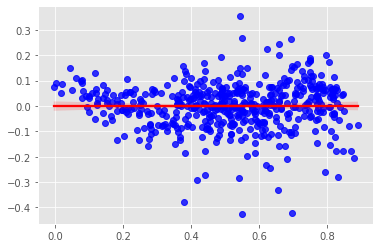

In [70]:
# Plotting the regplot for train_pred vs residuals
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={
            "color": "blue"}, line_kws={"color": "red"})
plt.show()


## ✅ Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [71]:
# Creating numeric variable list
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Apply the scalling
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Checking the test set after scalling
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_Feb,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [72]:
# Crealting X and y test dataset from df_test dataset
y_test = df_test.pop('cnt')
X_test = df_test

 
##   <font color='blue'> Creating X and y test dataset from df_test dataset</font>
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
# Now let us use our model to make predictions.

# Creating X_test_new dataframe by dropping the insignificant variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_lm = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_pred = lm5.predict(X_test_lm)

In [75]:
# let's see the predicted values
y_pred

184    0.459541
535    0.864619
299    0.403567
221    0.582288
152    0.531429
404    0.463815
198    0.527353
171    0.482372
512    0.812353
200    0.582221
509    0.802234
559    0.677783
109    0.499689
467    0.683575
339    0.189640
589    0.823781
222    0.573109
40     0.153947
682    0.617407
453    0.575033
606    0.835515
265    0.532469
510    0.790255
19     0.098130
117    0.404285
423    0.517453
614    0.866486
163    0.502916
630    0.758867
191    0.523025
572    0.799449
662    0.703485
264    0.502630
625    0.677533
325    0.202623
114    0.522128
218    0.553364
678    0.720702
24     0.105461
432    0.397388
395    0.469475
48     0.353044
684    0.664098
203    0.606919
450    0.606472
538    0.801782
73     0.182606
269    0.551439
710    0.556526
98     0.316769
530    0.775475
173    0.495379
418    0.571282
503    0.779604
727    0.388155
550    0.803313
714    0.570833
448    0.540731
248    0.212971
685    0.645636
410    0.519798
201    0.516230
41     0

## ✅ Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

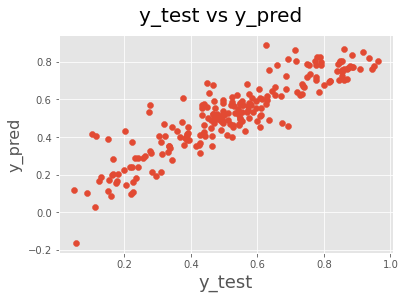

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()    

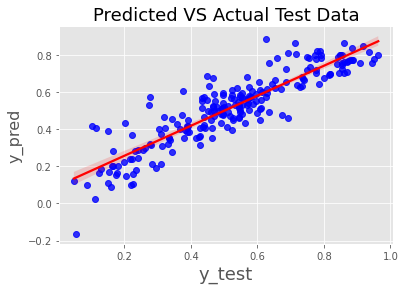

In [77]:
# Plotting y_test and y_pred using sns 
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.title('Predicted VS Actual Test Data', fontdict={'fontsize': 18}) # Heading
plt.show()

#### R-squared score on the test set.

In [78]:
# Caculate the r-squared 
r2_test = r2_score(y_test, y_pred)
r2_test

0.806934946278195

#### Adjusted R Squaired on test set

In [79]:
# Caculate the adjusted r-squared 
adj_r2 = round(
    1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 3)
print(adj_r2)


0.778


#### Equation for best fit line :

In [80]:
# Coefficent for the variables
round(lm5.params, 3)

const                                            0.271
yr                                               0.236
workingday                                       0.004
atemp                                            0.445
windspeed                                       -0.136
season_spring                                   -0.109
season_winter                                    0.034
mnth_January                                    -0.044
mnth_July                                       -0.061
mnth_September                                   0.056
weekday_Sunday                                  -0.043
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.284
weathersit_Mist-Cloudy_Mist-Broken              -0.081
dtype: float64

## <font color='blue'> Final Inferences and Recommendations for the Company: </font>
## ➤ <font  color='green'> Inferences: </font>
- Season:
The Fall Season sees the highest demand, while the Spring Season has the lowest demand for bikes.
- Weather Situation:
The weather condition "Clear, Few Clouds" results in the highest demand.
The "Light Snow, Light Rain" condition corresponds to the lowest demand.
- Year:
The year 2018 observed lower demand, whereas 2019 experienced a significant rise in demand.
- Month:
September has the highest demand, followed by October, August, and June.
January registers the lowest demand.
- Holiday:
There is notably higher demand on holidays compared to non-holidays.
- Weekday:
Demand does not show significant variation across weekdays.
## ➤ <font color='red'> Recommendations: </font>
- Monitor Weather Conditions:
- Since demand increases with favorable weather and higher temperatures, the company should optimize operations based on weather forecasts.
Leverage Annual Growth Trends:
- With an uptrend in annual demand, the company should focus on long-term strategies to ensure scalability and customer satisfaction.
Prepare for Seasonal Peaks:
- The company should allocate additional resources for September, October, and August, as these months show peak demand.
Winter Readiness:
- As demand surges during the Winter Season, it is crucial to ensure adequate bike availability and maintenance to meet the high demand effectively.
By strategically aligning operations with demand patterns, the company can maximize revenue and enhance customer satisfaction.